<a href="https://colab.research.google.com/github/RafalDoroz/mun/blob/main/VotingClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Importujemy potrzebne biblioteki
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier  # Głosowanie zespołowe
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Klasyfikatory
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Wczytujemy dane - zestaw cancer
cancer = load_breast_cancer()
X = cancer.data  # Dane wejściowe (cechy)
y = cancer.target  # Etykiety (klasy)


In [24]:
# Podział danych na zbiór treningowy i testowy (70% - trening, 30% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),  # Random Forest z parametrami
        ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),  # Gradient Boosting z parametrami
        ('lr', LogisticRegression(max_iter=1000))  # Regresja logistyczna
    ],
    voting='soft',  # Używamy miękkiego głosowania (na podstawie prawdopodobieństw)
    weights=[2, 1, 1],  # Przyznajemy większą wagę Random Forest (ważniejsze głosy)
)


In [26]:
# Trenujemy model na danych treningowych
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('lr', LogisticRegression(max_iter=1000))],
                 voting='soft', weights=[2, 1, 1])

In [27]:
# Dokonujemy predykcji na danych testowych
y_pred = voting_clf.predict(X_test)


In [28]:
# Wyświetlamy dokładność modelu
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Dokładność modelu Voting: {accuracy}')


Dokładność modelu Voting: 0.9766081871345029


In [29]:
# Wyświetlamy macierz pomyłek
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Macierz pomyłek:\n{conf_matrix}")


Macierz pomyłek:
[[ 60   3]
 [  1 107]]


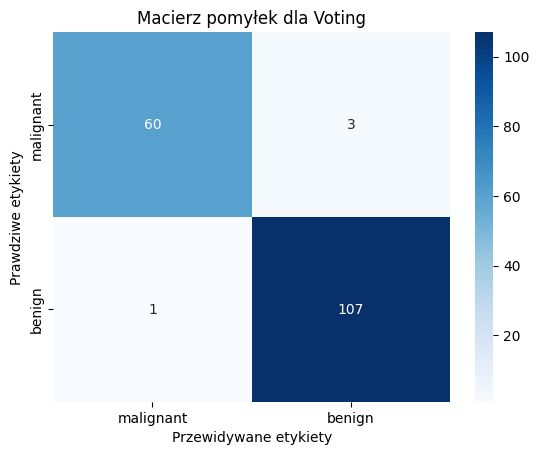

In [30]:
# Wizualizacja macierzy pomyłek
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Przewidywane etykiety')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz pomyłek dla Voting')
plt.show()
